In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('transactions_n100000.csv')

In [3]:
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260741 entries, 0 to 260740
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ticket_id        260741 non-null  object 
 1   order_timestamp  260741 non-null  object 
 2   location         260741 non-null  int64  
 3   item_name        260741 non-null  object 
 4   item_count       260741 non-null  int64  
 5   lat              260741 non-null  float64
 6   long             260741 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB


In [5]:
# set timestamp to datatime64 datatype
df.order_timestamp = pd.to_datetime(df.order_timestamp)

In [7]:
df_item = pd.DataFrame(df.item_name)

In [8]:
df_item

,item_name
0,shake
1,burger
2,fries
3,burger
4,salad
...,...
260736,burger
260737,salad
260738,fries
260739,burger


In [11]:
# one hot encode food attributes
one_hot = OneHotEncoder(sparse=False)
df_item = pd.DataFrame(one_hot.fit_transform(df_item),columns = ['burger','fries','salad','shake'],index=df.index)

In [15]:
df_item

,burger,fries,salad,shake
0,0.0,0.0,0.0,2.0
1,2.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,2.0,0.0
...,...,...,...,...
260736,3.0,0.0,0.0,0.0
260737,0.0,0.0,1.0,0.0
260738,0.0,4.0,0.0,0.0
260739,3.0,0.0,0.0,0.0


In [14]:
# append items' numbers to each type of food
df_item = df_item.where(df_item==0, df.item_count,axis=0)

In [16]:
df = pd.concat([df,df_item],axis=1)

In [17]:
df.drop(['item_name','item_count'],axis=1,inplace=True)

In [18]:
#dataframe grouped by ticket ID

df_new = df.groupby(by='ticket_id',sort=False)['burger','fries','salad','shake'].sum()

C:\Users\zjcxc\AppData\Local\Temp\ipykernel_18232\2945860658.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new = df.groupby(by='ticket_id',sort=False)['burger','fries','salad','shake'].sum()


In [20]:
df_new

,burger,fries,salad,shake
ticket_id,,,,
0x872a40,2.0,2.0,0.0,2.0
0x598eb3,1.0,3.0,2.0,0.0
0x5646c2,0.0,3.0,3.0,0.0
0x4022cf,0.0,4.0,4.0,0.0
0x7a39d9,5.0,5.0,0.0,5.0
...,...,...,...,...
0x75c9e7,2.0,2.0,0.0,0.0
0x66f1df,1.0,1.0,0.0,0.0
0x4e2756,4.0,4.0,0.0,4.0


In [21]:
scaler = MinMaxScaler()
df_new = pd.DataFrame(scaler.fit_transform(df_new),index=df_new.index,columns=['burger','fries','salad','shake'])

In [23]:
df_new['order_timestamp'] = df.groupby(by='ticket_id',sort=False)['order_timestamp'].first()
df_new['location'] = df.groupby(by='ticket_id',sort=False)['location'].mean()
df_new['lat'] = df.groupby(by='ticket_id',sort=False)['lat'].mean()
df_new['long'] = df.groupby(by='ticket_id',sort=False)['long'].mean()

In [24]:
#transaction data grouped by ticket ID

df_new

,burger,fries,salad,shake,order_timestamp,location,lat,long
ticket_id,,,,,,,,
0x872a40,0.4,0.25,0.0,0.4,2019-02-28 18:33:00,4,41.889047,-87.803605
0x598eb3,0.2,0.50,0.4,0.0,2019-09-18 11:59:00,5,41.881818,-87.640234
0x5646c2,0.0,0.50,0.6,0.0,2019-09-21 12:40:00,3,41.884490,-87.627059
0x4022cf,0.0,0.75,0.8,0.0,2019-09-21 12:25:00,4,41.889047,-87.803605
0x7a39d9,1.0,1.00,0.0,1.0,2019-09-05 17:21:00,7,41.794132,-88.010140
...,...,...,...,...,...,...,...,...
0x75c9e7,0.4,0.25,0.0,0.0,2019-10-27 01:17:00,6,41.784576,-87.607565
0x66f1df,0.2,0.00,0.0,0.0,2019-10-05 23:59:00,6,41.784576,-87.607565
0x4e2756,0.8,0.75,0.0,0.8,2019-10-12 16:29:00,8,41.894202,-87.620965


In [25]:
df_new["date"] = df_new.order_timestamp.dt.weekday

In [28]:
df_weekday = pd.DataFrame(one_hot.fit_transform(pd.DataFrame(df_new.date)),columns=['Mon','Tue','Wed','Thu',\
                                                                                    'Fri','Sat','Sun'])

In [30]:
df_weekday.index = df_new.index

In [31]:
df_new = pd.concat([df_new,df_weekday],axis=1)

In [32]:
df_new

,burger,fries,salad,shake,order_timestamp,location,lat,long,date,Mon,Tue,Wed,Thu,Fri,Sat,Sun
ticket_id,,,,,,,,,,,,,,,,
0x872a40,0.4,0.25,0.0,0.4,2019-02-28 18:33:00,4,41.889047,-87.803605,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0x598eb3,0.2,0.50,0.4,0.0,2019-09-18 11:59:00,5,41.881818,-87.640234,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0x5646c2,0.0,0.50,0.6,0.0,2019-09-21 12:40:00,3,41.884490,-87.627059,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0x4022cf,0.0,0.75,0.8,0.0,2019-09-21 12:25:00,4,41.889047,-87.803605,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0x7a39d9,1.0,1.00,0.0,1.0,2019-09-05 17:21:00,7,41.794132,-88.010140,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x75c9e7,0.4,0.25,0.0,0.0,2019-10-27 01:17:00,6,41.784576,-87.607565,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0x66f1df,0.2,0.00,0.0,0.0,2019-10-05 23:59:00,6,41.784576,-87.607565,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0x4e2756,0.8,0.75,0.0,0.8,2019-10-12 16:29:00,8,41.894202,-87.620965,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# transform the date into two attributes: weekday and weekend

weekday = []
for i in range(len(df_new)):
    weekday.append(df_new.iloc[i,9:14].sum())
weekend = []
for i in range(len(df_new)):
    weekend.append(df_new.iloc[i,14:16].sum())

In [34]:
df_new['weekday'] = weekday
df_new['weekend'] = weekend

In [35]:
df_new = df_new.drop(['date','Mon',"Tue","Wed","Thu","Fri","Sat","Sun"],axis=1)
df_new

,burger,fries,salad,shake,order_timestamp,location,lat,long,weekday,weekend
ticket_id,,,,,,,,,,
0x872a40,0.4,0.25,0.0,0.4,2019-02-28 18:33:00,4,41.889047,-87.803605,1.0,0.0
0x598eb3,0.2,0.50,0.4,0.0,2019-09-18 11:59:00,5,41.881818,-87.640234,1.0,0.0
0x5646c2,0.0,0.50,0.6,0.0,2019-09-21 12:40:00,3,41.884490,-87.627059,0.0,1.0
0x4022cf,0.0,0.75,0.8,0.0,2019-09-21 12:25:00,4,41.889047,-87.803605,0.0,1.0
0x7a39d9,1.0,1.00,0.0,1.0,2019-09-05 17:21:00,7,41.794132,-88.010140,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
0x75c9e7,0.4,0.25,0.0,0.0,2019-10-27 01:17:00,6,41.784576,-87.607565,0.0,1.0
0x66f1df,0.2,0.00,0.0,0.0,2019-10-05 23:59:00,6,41.784576,-87.607565,0.0,1.0
0x4e2756,0.8,0.75,0.0,0.8,2019-10-12 16:29:00,8,41.894202,-87.620965,0.0,1.0


In [36]:
# Round the order time to hour

freq = '60min' 
time = df_new.order_timestamp.dt.round(freq)
time = time.dt.hour

In [37]:
#initiate the order_time variable

time = pd.DataFrame(scaler.fit_transform(pd.DataFrame(time)),index=df_new.index,columns=['time_init'])

In [38]:
df_new.drop(['order_timestamp','lat','long'],axis=1,inplace=True)
df_new = pd.concat([df_new,time],axis=1)

In [39]:
df_new

,burger,fries,salad,shake,location,weekday,weekend,time_init
ticket_id,,,,,,,,
0x872a40,0.4,0.25,0.0,0.4,4,1.0,0.0,0.826087
0x598eb3,0.2,0.50,0.4,0.0,5,1.0,0.0,0.521739
0x5646c2,0.0,0.50,0.6,0.0,3,0.0,1.0,0.565217
0x4022cf,0.0,0.75,0.8,0.0,4,0.0,1.0,0.521739
0x7a39d9,1.0,1.00,0.0,1.0,7,1.0,0.0,0.739130
...,...,...,...,...,...,...,...,...
0x75c9e7,0.4,0.25,0.0,0.0,6,0.0,1.0,0.043478
0x66f1df,0.2,0.00,0.0,0.0,6,0.0,1.0,0.000000
0x4e2756,0.8,0.75,0.0,0.8,8,0.0,1.0,0.695652


In [40]:
# one hot encode the loc variable

df_loc = pd.DataFrame(one_hot.fit_transform(pd.DataFrame(df_new.location)),index=df_new.index)

In [41]:
df_new = pd.concat([df_new,df_loc],axis=1)
df_new.drop(['location'],axis=1,inplace=True)

In [42]:
#preprocessed data ready to cluster

df_new

,burger,fries,salad,shake,weekday,weekend,time_init,0,1,2,3,4,5,6,7,8
ticket_id,,,,,,,,,,,,,,,,
0x872a40,0.4,0.25,0.0,0.4,1.0,0.0,0.826087,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0x598eb3,0.2,0.50,0.4,0.0,1.0,0.0,0.521739,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0x5646c2,0.0,0.50,0.6,0.0,0.0,1.0,0.565217,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0x4022cf,0.0,0.75,0.8,0.0,0.0,1.0,0.521739,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0x7a39d9,1.0,1.00,0.0,1.0,1.0,0.0,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x75c9e7,0.4,0.25,0.0,0.0,0.0,1.0,0.043478,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0x66f1df,0.2,0.00,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0x4e2756,0.8,0.75,0.0,0.8,0.0,1.0,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


D:\anaconda\envs\py39_64\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\anaconda\envs\py39_64\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\anaconda\envs\py39_64\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\anaconda\envs\py39_64\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\anaconda\envs\py39_64\lib

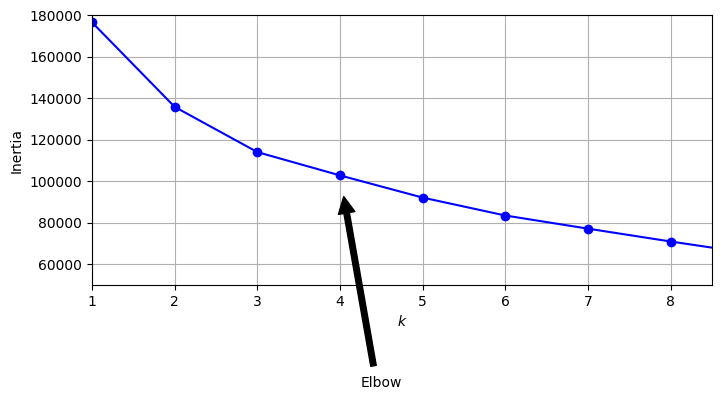

In [48]:
# Elbow test
import matplotlib.pyplot as plt
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_new)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 50000, 180000])
plt.grid()
# save_fig("inertia_vs_k_plot")
plt.show()

In [49]:
#use number of clusters = 4
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(df_new)

D:\anaconda\envs\py39_64\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
y_pred is kmeans.labels_

True

In [54]:
centers = kmeans.cluster_centers_

In [52]:
inertias

[176544.94476591976,
 135765.5722392153,
 113958.40601003713,
 102715.21297810935,
 92008.10409590708,
 83368.9571018523,
 77028.23621783977,
 70830.7972712672,
 64924.006627232084]

In [53]:
y_pred = pd.DataFrame(y_pred, index=df_new.index,columns=['group'])
y_pred

,group
ticket_id,
0x872a40,2
0x598eb3,3
0x5646c2,1
0x4022cf,1
0x7a39d9,2
...,...
0x75c9e7,1
0x66f1df,1
0x4e2756,1


In [55]:
center = pd.DataFrame(centers, columns = df_new.columns)

In [56]:
center

,burger,fries,salad,shake,weekday,weekend,time_init,0,1,2,3,4,5,6,7,8
0,0.325165,0.198708,0.033801,0.063282,1.000000e+00,-7.882583e-15,0.091084,-2.081668e-15,0.458000,-2.192690e-15,0.026105,-2.622902e-15,0.462591,0.026980,2.622902e-15,0.026324
1,0.370407,0.392374,0.143492,0.246637,8.215650e-15,1.000000e+00,0.467793,8.718057e-02,0.160129,8.791671e-02,0.113717,8.395555e-02,0.152487,0.111053,8.945911e-02,0.114102
2,0.736947,0.715328,0.035316,0.684902,1.000000e+00,-7.438494e-15,0.790779,2.814888e-02,0.028908,2.788079e-02,0.275904,2.738930e-02,0.026630,0.272374,3.614673e-02,0.276619
3,0.101926,0.284845,0.325951,0.038821,1.000000e+00,-1.010303e-14,0.522319,2.122183e-01,0.003127,2.119895e-01,0.050414,2.020745e-01,0.003127,0.051710,2.135911e-01,0.051748


In [59]:
center.to_csv('center.csv')